In [46]:
import pandas as pd
import numpy as np
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize

In [47]:
raw = pd.read_csv('../Data/df_design_matrix.csv')
print(raw.columns)
features = ['RefactoringType', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6']
output = 'AuthorGroup'
df = raw[['RefactoringType', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'AuthorGroup']]

le = {}
for col in features:
    le[col] = preprocessing.LabelEncoder()
    le[col].fit(raw[col])
    df[col] = le[col].transform(raw[col])
le[output] = preprocessing.LabelEncoder()
le[output].fit(raw[output])
df[output] = le[output].transform(raw[output])
X = df[features]
y = df[output]
y = y.astype(np.uint8)
n_classes = len(set(y))
Y = label_binarize(y, classes=[*range(n_classes)])

In [62]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
print("Pre-OverSampling:   ", sorted(Counter(y).items()))
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print("PostOverSampling:   ", sorted(Counter(y_resampled).items()))
# X_resampled, y_resampled = ADASYN().fit_resample(X, y)
# print(sorted(Counter(y_resampled).items()))

Pre-OverSampling:    [(0, 5940), (1, 1772), (2, 315), (3, 388)]
PostOverSampling:    [(0, 5940), (1, 5940), (2, 5940), (3, 5940)]


In [63]:
Y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [83]:
random = 42
scores = []
for random in [42]:
        print(num, "===================================================",random)
        X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=.33, random_state=random)



        clf = RandomForestClassifier(n_estimators=num, max_depth=30, random_state=random)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


        print(confusion_matrix(le['AuthorGroup'].inverse_transform(y_test),le['AuthorGroup'].inverse_transform(y_pred)))
        print(classification_report(le['AuthorGroup'].inverse_transform(y_test),le['AuthorGroup'].inverse_transform(y_pred)))
        print(accuracy_score(le['AuthorGroup'].inverse_transform(y_test),le['AuthorGroup'].inverse_transform(y_pred)))
        scores.append(accuracy_score(le['AuthorGroup'].inverse_transform(y_test),le['AuthorGroup'].inverse_transform(y_pred)))

30 =================================================== 42
Mean Absolute Error: 11.692473892689954
Mean Squared Error: 0.2412675549153763
Root Mean Squared Error: 0.49118993771796293
[[1903   40   22   14]
 [  59  515    7   10]
 [  48    3   49    4]
 [  11    2    4   86]]
                precision    recall  f1-score   support

extremely high       0.94      0.96      0.95      1979
          high       0.92      0.87      0.89       591
           low       0.60      0.47      0.53       104
        medium       0.75      0.83      0.79       103

      accuracy                           0.92      2777
     macro avg       0.80      0.78      0.79      2777
  weighted avg       0.92      0.92      0.92      2777

0.9193374144760533


NameError: name 'scores' is not defined

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve


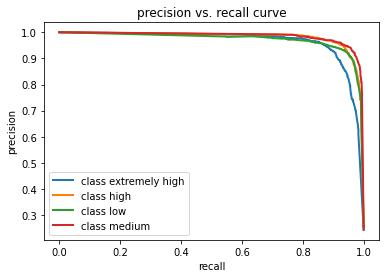

In [80]:
import matplotlib.pyplot as plt
# precision recall curve
precision = dict()
recall = dict()
for i in range(4):
    y_score = clf.predict_proba(X_test)[:, i]
    precision[i], recall[i], _ = precision_recall_curve(y_test[:]==i,
                                                        y_score[:])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(le[output].inverse_transform([i])[0]))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

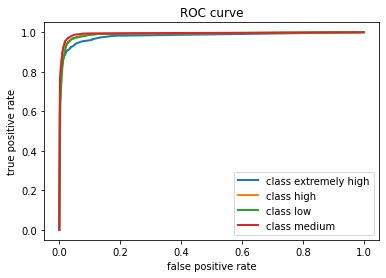

In [78]:
fpr = dict()
tpr = dict()

for i in range(n_classes):
    y_score = clf.predict_proba(X_test)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test[:]==i,
                                  y_score[:])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(le[output].inverse_transform([i])[0]))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()